In [1]:
from src.config import ROOT_DIR
from os.path import join, exists
import os

import pandas as pd
import numpy as np
import functools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Project Directory: /data2/mito_lineage


In [2]:
from mplh.cluster_help import plot_cluster

In [3]:
outdir = "data/processed/mttrace/testsets"
indir = "data/tests/psuedo_08162021"
outdir = join(ROOT_DIR, outdir)
indir = join(ROOT_DIR, indir)

In [4]:
if not exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/testsets'

In [5]:
names = ["pre", "post"]
for name in names:
    if not exists(join(outdir, name)):
        os.mkdir(join(outdir, name))

## Load input:
clone_variant_means: Clone-by-variant mean AF
clone_enrichment: df with 'Clone', 'Donor', and 'Enrichment' to say if enriched in post or pre (1 means no change)

In [6]:
clone_variant_means = pd.read_csv(join(indir, "clone_variants.csv"), index_col=0)
clone_variant_means

,1A>G,2G>A,3C>T,4A>G,5G>A,6A>C,7C>T,8T>C,9T>C,10C>T,11A>G
Clone,,,,,,,,,,,
1,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.8,0.0
2,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.8,0.8,0.0
3,0.0,0.0,0.0,0.0,0.1,0.3,0.0,0.0,0.8,0.8,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.0,0.9


In [7]:
clone_enrichment = pd.read_csv(join(indir, "enrichment.csv"), index_col=0)
clone_enrichment

,Donor,Enrichment
Clone,,
1,1,2.00
2,1,0.25
3,1,1.00
4,2,4.00
5,2,1.00


In [8]:
cond_vcf_files = {"pre": join(indir, "testPre.base.vcf.tsv"), "post": join(indir, "testPost.base.vcf.tsv")}

## Setup parameters for clone numbers in Pre condition

In [9]:
num_cells_per_cond = 1000
num_donors = 2
dropout=None
other_vaf = 0.1

cond="pre"

print(cond)
vcf = pd.read_csv(cond_vcf_files[cond], sep='\t')
vcf["ID"] = vcf.apply(lambda x: str(x["POS"]) + x["REF"]+">"+x["ALT"], axis=1) 
donor_cells = np.random.choice(a=range(1,num_donors+1), size=num_cells_per_cond)
donor_cell_numbers = {}
for i in range(1,num_donors+1):
    donor_cell_numbers[i] = sum(np.array(donor_cells)==i )
#donor_cell_numbers = {i:sum(np.array(donor_cells)==i )}


# Create clone sizes in initial environment from uniform distribution
clone_sizes = {}
clone_cell_numbers = {}
for don in donor_cell_numbers:
    curr_clones = clone_enrichment.loc[clone_enrichment["Donor"]==don].index
    print('curr_clones', curr_clones)
    clone_cells = np.random.choice(a=curr_clones, size=donor_cell_numbers[don])
    
    for i in curr_clones:
        clone_cell_numbers[i] = sum(np.array(clone_cells)==i)

# Create cell names with donor & clone information information. 
cells_d = {}
count = 0
for don in donor_cell_numbers:
    curr_clones = clone_enrichment.loc[clone_enrichment["Donor"]==don].index
    for i in curr_clones:
        cells_d[(don, i)] = list(map(lambda x: f"{x}_d{don}_c{i}",np.arange(donor_cell_numbers[don])))


#print(cells_d)

pre
curr_clones Int64Index([1, 2, 3], dtype='int64', name='Clone')
curr_clones Int64Index([4, 5], dtype='int64', name='Clone')


### Create master list of BCs to use for both post and pre


In [10]:
import random
N=15
total_cells = 100000
curr = ''.join(random.choice(["A","C","T","G"]) for _ in range(N)) + "-1"
BCs = {}
for i in np.arange(1,total_cells+1):
    curr = ''.join(random.choice(["A","C","T","G"]) for _ in range(N)) + "-1"
    while curr in BCs:
        curr = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(N)) + "-1"
    BCs[i] = curr
BCs

{1: 'CTGAGCCTGATCAGC-1',
 2: 'GAATTATTGAACGGA-1',
 3: 'TTCAGATCGCCTTAT-1',
 4: 'AGATCACGAATCTGG-1',
 5: 'TCCCATCCATAGCAA-1',
 6: 'ATGCTTACCTAGATG-1',
 7: 'AACGGCGGCAGCTTA-1',
 8: 'TACTAAAATGTAATT-1',
 9: 'CGGGTAGACCCCATA-1',
 10: 'TGTAACCGTTCGCGT-1',
 11: 'AATGCGTCTACGGCT-1',
 12: 'TCAAGGTATTCAAAG-1',
 13: 'ATCAGCTCCATGTGT-1',
 14: 'GGTCGAAGATTACCC-1',
 15: 'ACTTTGTGGGTCGAC-1',
 16: 'GTGATTGTCAGTTGG-1',
 17: 'TTGACCGAGCATAAA-1',
 18: 'GGCACACAGTGTTGT-1',
 19: 'GAGACACGGAAGTCA-1',
 20: 'ATAATCCGCTTACAT-1',
 21: 'AAGTAGAACACCCTG-1',
 22: 'AACCACAGTTCTGGG-1',
 23: 'CGTGTAAGAATACTC-1',
 24: 'GCACTGGGCAGCACA-1',
 25: 'ACACGTGACCTCAGT-1',
 26: 'GTGGCCAGGCTCGAT-1',
 27: 'AGTTTGCAAGCGGCT-1',
 28: 'GACGATTCTACGCGA-1',
 29: 'CTAAACATAACAAAT-1',
 30: 'GCTTCGCGTGAATCT-1',
 31: 'TGTGCATTCAATTCG-1',
 32: 'GAGATAGAGTTTTTG-1',
 33: 'GTACTCTATCTACTA-1',
 34: 'CGCTATCTTGAATCT-1',
 35: 'TTCCATCTGGAGGAG-1',
 36: 'CTATTGGGGTATGCT-1',
 37: 'CCTGGTCCTGGAGTA-1',
 38: 'ACATCGGGGTTTTCA-1',
 39: 'GCGCTGCAAGCCCTG

In [11]:
len(BCs)

100000

## Create AD and DP dense dfs for cells

In [12]:

# Setup initial matrix
pre_AD = pd.DataFrame(index = functools.reduce(lambda a,b : a+b, cells_d.values()), columns=vcf["ID"].values)
pre_DP = pd.DataFrame(index = functools.reduce(lambda a,b : a+b, cells_d.values()), columns=vcf["ID"].values)


for don in np.arange(1,num_donors+1): 
    print(don)
    curr_don_num = donor_cell_numbers[don]
    curr_clones = clone_enrichment.loc[clone_enrichment["Donor"]==don].index
    for clone, clone_df in clone_variant_means.loc[clone_variant_means.index.isin(curr_clones)].iterrows():
        for variant, vaf in clone_df.iteritems():
            pre_AD.loc[cells_d[don, clone], variant] = np.random.normal(loc=vaf, scale=0.01, size=len(cells_d[don, clone]))
            pre_DP.loc[cells_d[don, clone], variant] = [2**x if x!= 0 else 0 for x in np.random.poisson(lam=4, size=len(cells_d[don, clone]))]

pre_AD = pre_AD.fillna(0)
pre_AD[pre_AD<0] = 0
print('pre_AD 1')
print(pre_AD.head())

1
2
pre_AD 1
             1A>G      3C>T      4A>G      5G>A      6A>C      8T>C      9T>C  \
0_d1_c1  0.389406  0.004845  0.000521  0.023443  0.000000  0.000000  0.795427   
1_d1_c1  0.419256  0.012548  0.018577  0.022076  0.005995  0.001642  0.802413   
2_d1_c1  0.421806  0.010516  0.000000  0.000000  0.000000  0.016567  0.783598   
3_d1_c1  0.392534  0.007932  0.000000  0.001506  0.000000  0.000000  0.789840   
4_d1_c1  0.405314  0.000000  0.006161  0.000000  0.002949  0.008534  0.786812   

            10C>T     11A>G      2G>A      7C>T  
0_d1_c1  0.817793  0.000000  0.387162  0.008715  
1_d1_c1  0.797114  0.000000  0.414005  0.000000  
2_d1_c1  0.793186  0.001539  0.395229  0.000000  
3_d1_c1  0.802807  0.000000  0.394551  0.000000  
4_d1_c1  0.809870  0.002290  0.407441  0.000000  


## Remap and make sparse

In [13]:
# Create vars map:
vars_int = {x:i+1 for i, x in enumerate(pre_AD.columns)}

# Create cells map
cells_int = {}
count = 1
for k in cells_d:
    for cell in cells_d[k]:
        cells_int[cell] = count
        count+=1

        
pre_AD = pre_AD.reset_index().melt(id_vars="index", value_name="Counts")
pre_DP = pre_DP.reset_index().melt(id_vars="index", value_name="Counts")
print('pre_AD melt')
print(pre_AD.head())
pre_AD["CB_index"] = pre_AD["index"].map(cells_int)
pre_AD["BC"] = pre_AD["CB_index"].map(BCs)
pre_AD["Var_index"] = pre_AD["variable"].map(vars_int)

pre_DP["CB_index"] = pre_DP["index"].map(cells_int)
pre_DP["BC"] = pre_DP["CB_index"].map(BCs)
pre_DP["Var_index"] = pre_DP["variable"].map(vars_int)



print('pre_AD reindex')
print(pre_AD.head())

pre_AD = pre_AD.dropna().astype({"Var_index":int}) # Removes variants not in vcf
pre_DP = pre_DP.dropna().astype({"Var_index":int})

pre_AD["Counts"] = np.ceil(pre_AD["Counts"]*pre_DP["Counts"]).astype(int)



pre_AD melt
     index variable    Counts
0  0_d1_c1     1A>G  0.389406
1  1_d1_c1     1A>G  0.419256
2  2_d1_c1     1A>G  0.421806
3  3_d1_c1     1A>G  0.392534
4  4_d1_c1     1A>G  0.405314
pre_AD reindex
     index variable    Counts  CB_index                 BC  Var_index
0  0_d1_c1     1A>G  0.389406         1  CTGAGCCTGATCAGC-1          1
1  1_d1_c1     1A>G  0.419256         2  GAATTATTGAACGGA-1          1
2  2_d1_c1     1A>G  0.421806         3  TTCAGATCGCCTTAT-1          1
3  3_d1_c1     1A>G  0.392534         4  AGATCACGAATCTGG-1          1
4  4_d1_c1     1A>G  0.405314         5  TCCCATCCATAGCAA-1          1


## Save

In [14]:
pre_AD.to_csv(join(outdir, "pre", "fullPre.AD.mtx"), sep='\t', index=False)
pre_AD.drop(["index", 'variable'], axis=1)[["CB_index", "Var_index", "Counts"]].to_csv(join(outdir, "pre", "cellSNP.tag.AD.mtx"), sep='\t', header=None, index=False)
pre_DP.to_csv(join(outdir, "pre", "fullPre.DP.mtx"), sep='\t')
pre_DP.drop(["index", 'variable'], axis=1)[["CB_index", "Var_index", "Counts"]].to_csv(join(outdir, "pre", "cellSNP.tag.DP.mtx"), sep='\t', header=None, index=False)
vcf.to_csv(join(outdir, "pre", "cellSNP.base.vcf"),sep='\t', index=False)

## Rename cells to similar BC format and save with same order
pre_BCs = [BCs[i] for i in np.arange(1,len(cells_int)+1)]

with open(join(outdir, "pre", "cellSNP.samples.tsv"),"w") as f:
    f.write("\n".join(pre_BCs))

clustering
cmap None
clustering
cmap None


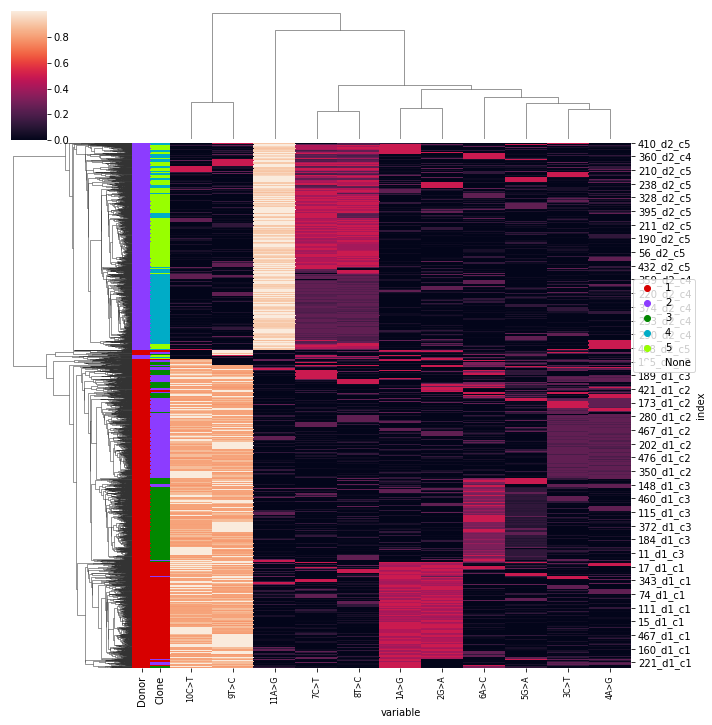

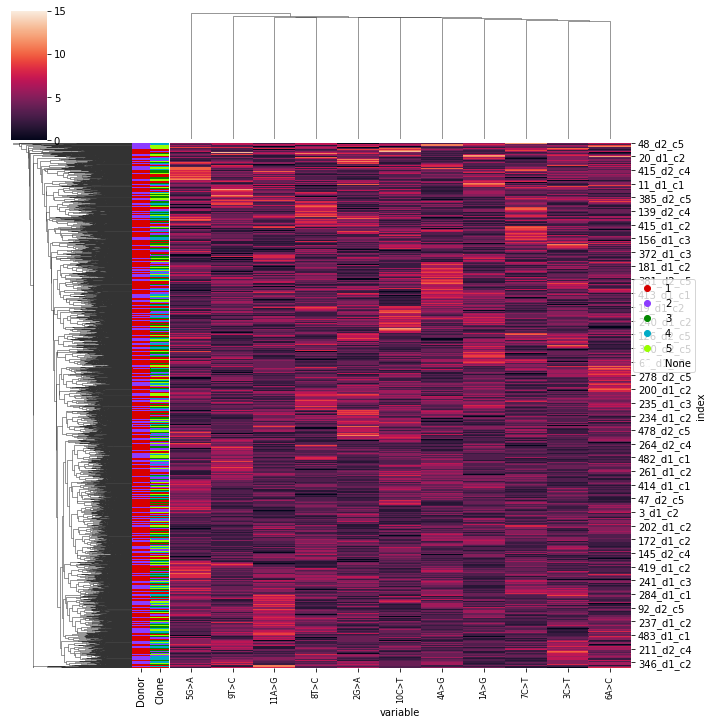

In [15]:
pre_AD_full = pre_AD.pivot(index="index", columns="variable", values="Counts").astype(int)
pre_DP_full = pre_DP.pivot(index="index", columns="variable", values="Counts").astype(int)
pre_AF_full = pre_AD_full/(pre_DP_full+0.001).astype(float)
pre_AF_full

## Create cell meta data
cells_meta = pd.DataFrame(list(map(lambda x: (int(x.split("_")[1][1:]), int(x.split("_")[2][1:])) ,pre_AF_full.index)), index=pre_AF_full.index, 
                          columns=["Donor", "Clone"])


## Plot cells AF and DP

plot_cluster(pre_AF_full, row_meta=cells_meta)

plot_cluster(np.log2(1+pre_DP_full), row_meta=cells_meta)

# Setup "Post" condition

In [16]:
# Setup culture condition
growth = {i:donor_cell_numbers[i]*clone_enrichment for i in donor_cell_numbers}
post_cells = {}
for d, c in cells_d.keys():
    post_cells[c] = clone_cell_numbers[c]*float(clone_enrichment.loc[c, "Enrichment"])
## Subset from each donor from each clone based on max cells
cond = "post"
vcf = pd.read_csv(cond_vcf_files[cond], sep='\t')
vcf["ID"] = vcf.apply(lambda x: str(x["POS"]) + x["REF"]+">"+x["ALT"], axis=1) 

subset_inds = np.sort(np.random.choice(int(sum(post_cells.values())), 1000, replace=False))

count = 0
post_clone_cell_numbers_subset = {}
for c in post_cells:
    post_clone_cell_numbers_subset[c] = sum((subset_inds>=count)&(subset_inds<count+post_cells[c]))
    count += post_cells[c]
post_clone_cell_numbers_subset




# Create cell names with donor & clone information information. 
post_cells_d = {}
count = 0
for clone in post_clone_cell_numbers_subset:
    #curr_clones = clone_enrichment.loc[clone_enrichment.index==clone].index
    don = clone_enrichment.loc[clone, "Donor"]
    post_cells_d[(don, clone)] = list(map(lambda x: f"{x}_d{don}_c{clone}",np.arange(post_clone_cell_numbers_subset[clone])))



## Create dense dfs

In [17]:
# Setup initial matrix
post_AD = pd.DataFrame(index = functools.reduce(lambda a,b : a+b, post_cells_d.values()), columns=vcf.apply(lambda x: str(x["POS"]) + x["REF"]+">"+x["ALT"], axis=1))
post_DP = pd.DataFrame(index = functools.reduce(lambda a,b : a+b, post_cells_d.values()), columns=vcf.apply(lambda x: str(x["POS"]) + x["REF"]+">"+x["ALT"], axis=1))

for don in np.arange(1,num_donors+1): 
    print(don)
    post_don_num = donor_cell_numbers[don]
    post_clones = clone_enrichment.loc[clone_enrichment["Donor"]==don].index
    for clone, clone_df in clone_variant_means.loc[clone_variant_means.index.isin(post_clones)].iterrows():
        for variant, vaf in clone_df.iteritems():
            post_AD.loc[post_cells_d[don, clone], variant] = np.random.normal(loc=vaf, scale=0.01, size=len(post_cells_d[don, clone]))
            post_DP.loc[post_cells_d[don, clone], variant] = [2**x if x!= 0 else 0 for x in np.random.poisson(lam=4, size=len(post_cells_d[don, clone]))]




1
2


## Remap and create sparse

In [18]:
cells_int = {}
count = 1
for k in post_cells_d:
    for cell in post_cells_d[k]:
        cells_int[cell] = count
        count+=1
# Create vars map:
vars_int = {x:i+1 for i, x in enumerate(post_AD.columns)}
    
post_AD = post_AD.reset_index().melt(id_vars="index", value_name="Counts")
post_DP = post_DP.reset_index().melt(id_vars="index", value_name="Counts")
print('post_AD melt')
print(post_AD.head())
post_AD["CB_index"] = post_AD["index"].map(cells_int)
post_DP["CB_index"] = post_DP["index"].map(cells_int)

post_AD["Var_index"] = post_AD["variable"].map(vars_int)
post_DP["Var_index"] = post_DP["variable"].map(vars_int)
print('post_AD reindex')
print(post_AD.head())

post_AD = post_AD.dropna().astype({"Var_index":int}) # Removes variants not in vcf
post_DP = post_DP.dropna().astype({"Var_index":int})

post_AD["Counts"] = np.ceil(post_AD["Counts"]*post_DP["Counts"]).astype(int)



post_AD melt
     index variable    Counts
0  0_d1_c1     1A>G  0.397723
1  1_d1_c1     1A>G  0.390073
2  2_d1_c1     1A>G  0.385654
3  3_d1_c1     1A>G  0.377602
4  4_d1_c1     1A>G  0.386361
post_AD reindex
     index variable    Counts  CB_index  Var_index
0  0_d1_c1     1A>G  0.397723         1          1
1  1_d1_c1     1A>G  0.390073         2          1
2  2_d1_c1     1A>G  0.385654         3          1
3  3_d1_c1     1A>G  0.377602         4          1
4  4_d1_c1     1A>G  0.386361         5          1


In [19]:

post_AD.to_csv(join(outdir, "post", "fullPost.AD.mtx"), sep='\t', index=False)
post_AD.drop(["index", 'variable'], axis=1)[["CB_index", "Var_index", "Counts"]].to_csv(join(outdir, "post", "cellSNP.tag.AD.mtx"), sep='\t', header=None, index=False)
post_DP.to_csv(join(outdir, "post", "fullPost.DP.mtx"), sep='\t')
post_DP.drop(["index", 'variable'], axis=1)[["CB_index", "Var_index", "Counts"]].to_csv(join(outdir, "post", "cellSNP.tag.DP.mtx"), sep='\t', header=None, index=False)
vcf.to_csv(join(outdir, "post", "cellSNP.base.vcf"),sep='\t', index=False)
## Rename cells to similar BC format and save with same order
post_BCs = [BCs[i] for i in np.arange(1,len(cells_int)+1)]

with open(join(outdir, "post", "cellSNP.samples.tsv"),"w") as f:
    f.write("\n".join(post_BCs))


In [20]:
post_AD

,index,variable,Counts,CB_index,Var_index
0,0_d1_c1,1A>G,7,1,1
1,1_d1_c1,1A>G,2,2,1
2,2_d1_c1,1A>G,4,3,1
3,3_d1_c1,1A>G,25,4,1
4,4_d1_c1,1A>G,7,5,1
...,...,...,...,...,...
10995,126_d2_c5,5G>A,0,996,11
10996,127_d2_c5,5G>A,1,997,11
10997,128_d2_c5,5G>A,0,998,11
10998,129_d2_c5,5G>A,0,999,11


clustering
cmap None
clustering
cmap None


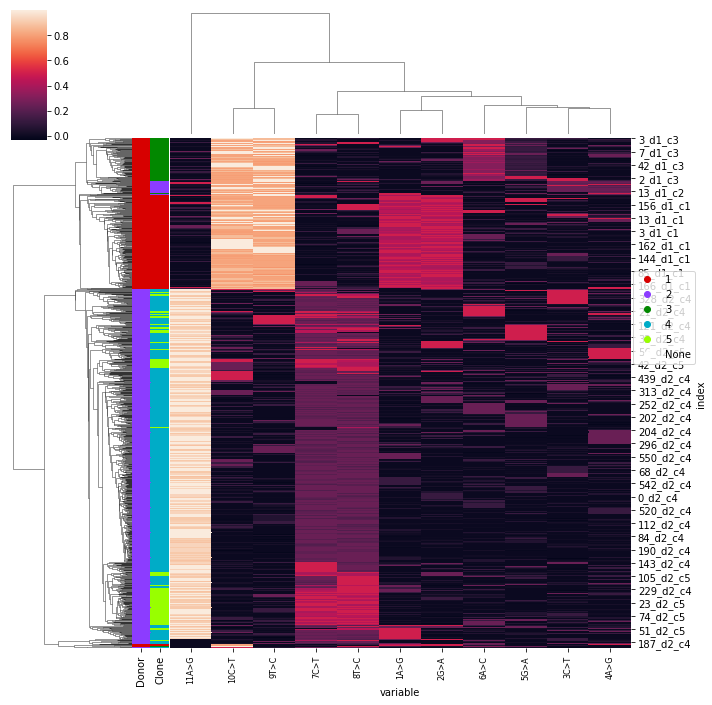

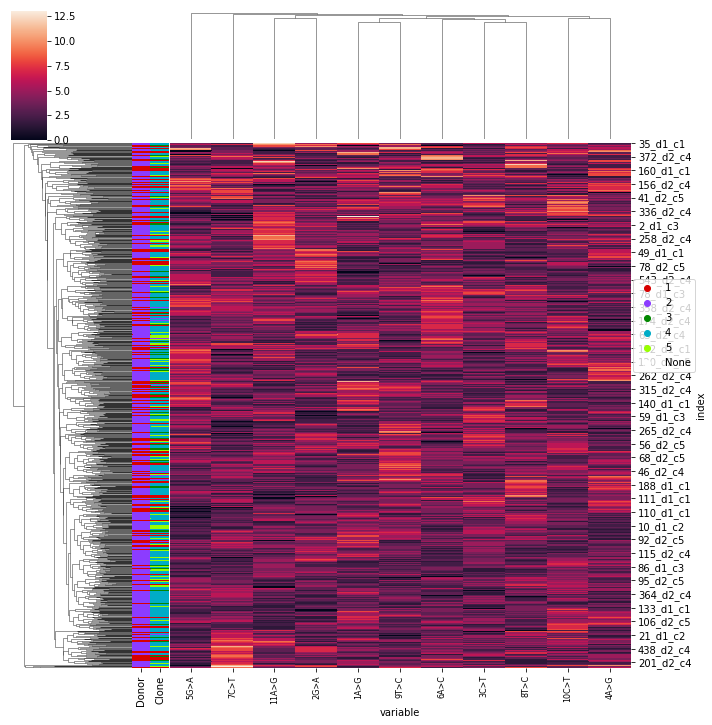

In [21]:
post_AD_full = post_AD.pivot(index="index", columns="variable", values="Counts").astype(int)
post_DP_full = post_DP.pivot(index="index", columns="variable", values="Counts").astype(int)
post_AF_full = post_AD_full/(post_DP_full+0.001).astype(float)
post_AF_full

## Create cell meta data
cells_meta = pd.DataFrame(list(map(lambda x: (int(x.split("_")[1][1:]), int(x.split("_")[2][1:])) ,post_AF_full.index)), index=post_AF_full.index, 
                          columns=["Donor", "Clone"])


## Plot cells AF and DP

plot_cluster(post_AF_full, row_meta=cells_meta)

plot_cluster(np.log2(1+post_DP_full), row_meta=cells_meta)